In [1]:
# Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv("Titanic_test.csv")
df_train = pd.read_csv("Titanic_train.csv")
#印出前幾筆看資料的狀態
display(df_test.head(5))
display(df_train.head(5))
# 測試資料集和訓練資料訊息
print('測試(test)資料集:')
df_test.info()
print('\n**************************************************************')
print('訓練(Train)資料集:')
df_train.info()
# Q1答案:觀察下面資料，Test 資料集沒有「Survived」欄位。

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


測試(test)資料集:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

**************************************************************
訓練(Train)資料集:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P

In [2]:
# Q2: 測試資料集是否有遺失值?
print('統計測試資料集裡是否有空值:')
print(df_test.isnull().any())
# Q2答案: 測試資料集 Age、Fare、Cabin 欄位有遺失值

統計測試資料集裡是否有空值:
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [3]:
# Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，
#     你覺得以這個變數而言，試著說明每一個方法的差異。
#合併資料
df_data = df_train.append(df_test)
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# 以 XXX 為例，先看 Cabin  出現值的特性
# 計算 Cabin 中有值之資料筆數，與觀察種類
total_Cabin = df_data['Cabin'].notnull().sum()
print('Cabin 有紀錄:',total_Cabin)
df_data['Cabin'].unique()
# Cabin欄位少了1,014筆： 1309-295 = 1014

Cabin 有紀錄: 295


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabin Survived:
 -    206
B     35
C     35
D     25
E     24
F      8
A      7
G      2
Name: Cabin, dtype: int64

Cabin Dead:
 -    481
C     24
B     12
E      8
A      8
D      8
F      5
G      2
T      1
Name: Cabin, dtype: int64
P1:
 C    94
-    67
B    65
D    40
E    34
A    22
T     1
Name: Cabin, dtype: int64

P2:
 -    254
F     13
D      6
E      4
Name: Cabin, dtype: int64

P3:
 -    693
F      8
G      5
E      3
Name: Cabin, dtype: int64


<AxesSubplot:>

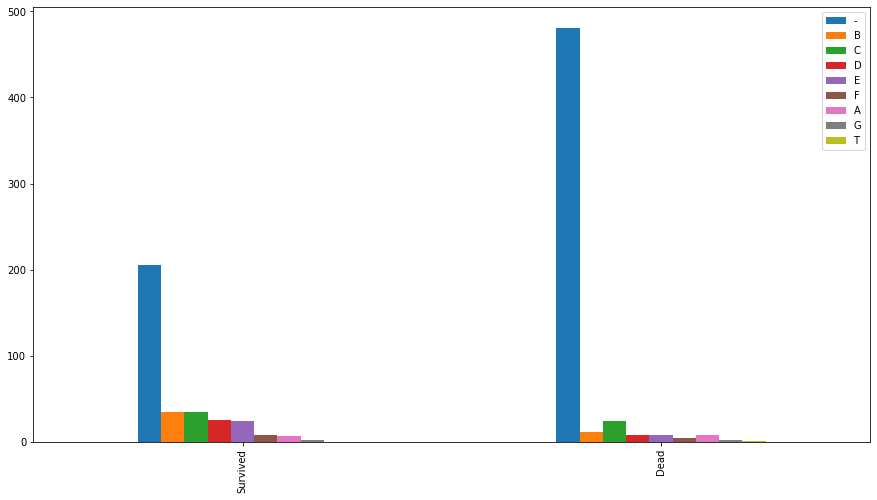

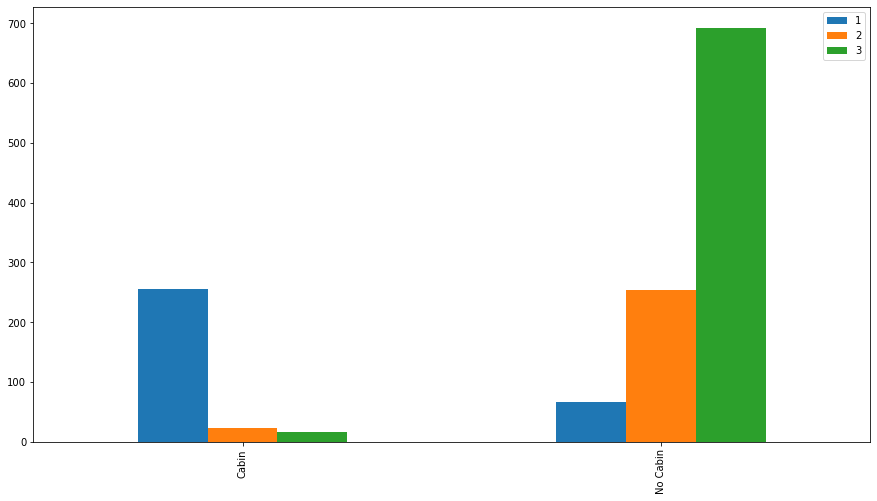

In [5]:
# 觀察 Cabin 資料缺失值，取出有紀錄的第一個英文字母，如果為缺失值，則使用 -
# 此處將 Cabin 提取第一個英文字母，是看到似乎為艙房分區用，分類後來看與 Pclass 之間的關係
df_data['Cabin'] = df_data['Cabin'].apply(lambda x:str(x)[0] if not pd.isnull(x) else '-')
df_data['Cabin'].unique()

# Cabin 在遺失值補上資料查看其存活分布狀況
survived_cabin = df_data[df_data['Survived']==1]['Cabin'].value_counts()
dead_cabin = df_data[df_data['Survived']==0]['Cabin'].value_counts()
df_c = pd.DataFrame([survived_cabin,dead_cabin])
df_c.index = ['Survived','Dead']
df_c.plot(kind='bar', stacked=False, figsize=(15,8))
print('Cabin Survived:\n',survived_cabin)
print('\nCabin Dead:\n',dead_cabin)

# 比較 Cabin 在遺失值補上資料查看與 Pclass 的存活分布狀況
total_Cabin_p1 = df_data[df_data['Pclass']==1]['Cabin'].value_counts()
total_Cabin_p2 = df_data[df_data['Pclass']==2]['Cabin'].value_counts()
total_Cabin_p3 = df_data[df_data['Pclass']==3]['Cabin'].value_counts()
print('P1:\n',total_Cabin_p1)
print('\nP2:\n',total_Cabin_p2)
print('\nP3:\n',total_Cabin_p3)

pclass_cabin = df_data[df_data['Cabin']!='-']['Pclass'].value_counts()
pclass_nocabin = df_data[df_data['Cabin']=='-']['Pclass'].value_counts()
df_cp = pd.DataFrame([pclass_cabin,pclass_nocabin])
df_cp.index = ['Cabin','No Cabin']
df_cp.plot(kind='bar', stacked=False, figsize=(15,8))

# Q3答案：I.因 Cabin 欄位缺失值為文字，經觀察後處理不規則的艙號
#            並提取第一個英文字母做為歸類方式，並透過圖形輔助判斷
#            得到下面資料
#            一、存有Cabin資料的乘客的特性：
#               (1) 存活率較高，約67%（有136人存活，68人死亡）
#               (2) 存活率較高的船艙編號較集中於 P1
#               (3) 存活率分別為P1(B)→P2(F)→P3(G)
#            二、沒有Cabin資料的乘客的特性：
#               (1) 死亡率較高，約70%（有206人存活，481人死亡）
#               (2) 死亡率較高的船艙編號較集中於 P3、P2 次之
#         II.Cabin　變數為文字型態，無法用數值統計方式（如：中位數、最大／小值），
#            較適合從原始資料找出有效的辨識或規則，當作分析資料的依據；
#            此處用取第一個英文字母做為歸類方式，有效地找出與 Pclass 之間的關係，
#            以及存活率之間的關係。